In [16]:
%matplotlib inline

import copy
import matplotlib.pyplot as pyplot

import numpy as np

import geopandas as gpd
import shapely.geometry as geom
import shapely.affinity as affine

from weavingspace import Topology
from weavingspace import TileShape
from weavingspace import TileUnit
from weavingspace import WeaveUnit
from weavingspace import tiling_utils

In [17]:
square = tiling_utils.get_regular_polygon(200, 4)
L_shape = square.union(
  affine.translate(square, 200, 0)).union(
  affine.translate(square, 0, 200))
L_shape = tiling_utils.get_clean_polygon(L_shape)

tile = TileUnit()
tile.base_shape = TileShape.HEXAGON
tile.tiles = gpd.GeoDataFrame(
  {"tile_id": list("abcd")},
  geometry = gpd.GeoSeries([affine.translate(L_shape, -100, 200), 
                            affine.translate(L_shape, 100, -200),
                            affine.translate(L_shape, -100, -400), 
                            affine.translate(L_shape, -300, 0)]))
tile.setup_regularised_prototile_from_tiles()
tile.prototile = gpd.GeoDataFrame(
  geometry = gpd.GeoSeries(
    geom.Polygon([(100, -450), (-300, -350), (-300, 350),
                  (-100, 450), (300, 350), (300, -350)])))
tile.setup_vectors()

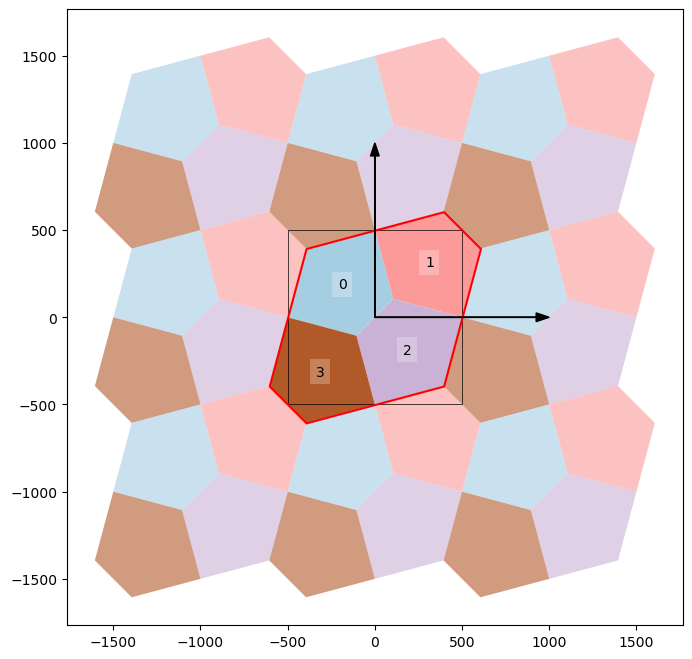

In [18]:
# tile = TileUnit(tiling_type = "archimedean", code = "3.3.4.3.4")
# tile = TileUnit(tiling_type = "hex-dissection", n = 7, offset = 1)
# tile = TileUnit(tiling_type = "hex-slice", n = 3, offset = 1)
# tile = TileUnit(tiling_type = "archimedean", code = "3.4.6.4")
# tile = TileUnit(tiling_type = "archimedean", code = "3.12.12")
# tile = TileUnit(tiling_type = "archimedean", code = "4.8.8")
tile = TileUnit(tiling_type = "cairo", n = 3)
# tile = TileUnit(tiling_type = "hex-colouring", n = 3).transform_skew(20).transform_scale(1.2)
# tile = WeaveUnit(weave_type = "plain", n = 2, strands = "a|d")
# tile = WeaveUnit(weave_type = "basket", n = 3, strands = "abc|def", spacing = 200)
# tile = WeaveUnit(weave_type = "twill", n = 2, strands = "ab|de")
ax = tile.plot(r = 1, show_reg_prototile = True, show_prototile = True, cmap = "Paired", show_ids = "id", r_alpha = 0.6, show_vectors = True)

In [19]:
topo = Topology(tile)

## Plot of topology
Various options - but showing below the vertex and edge labelling resulting from determination of transitivity classes, and with tiles coloured by transitivity class.

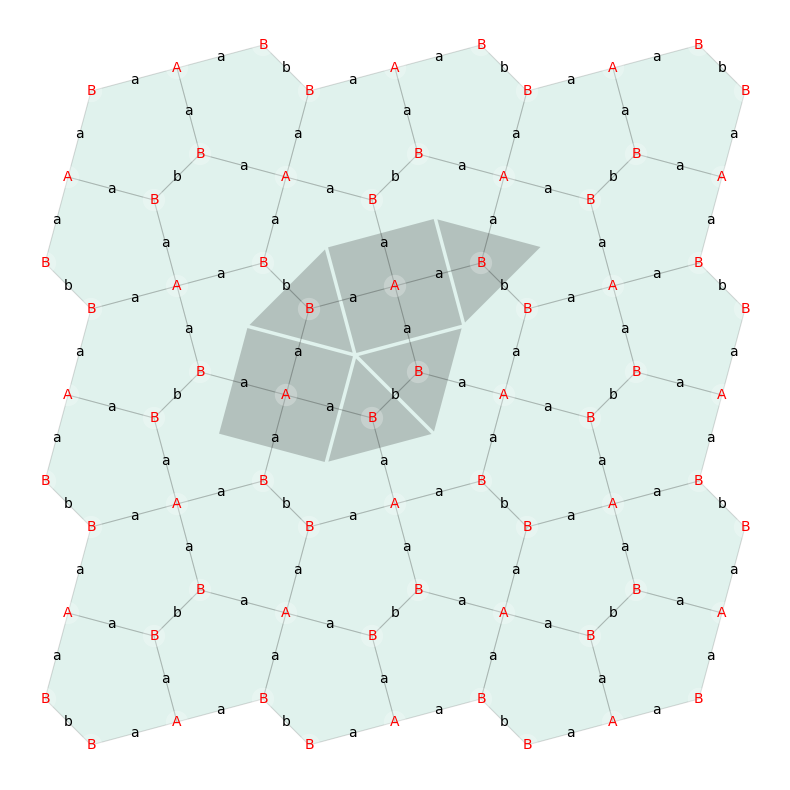

In [20]:
ax = topo.plot(
  show_original_tiles = True,
  show_tile_vertex_labels = False,
  show_tile_edge_labels = False,
  show_tile_centres = False,
  show_vertex_labels = True,
  show_vertex_ids = False,
  show_edge_labels = True,
  show_edges = False,
  offset_edges = False,
  show_dual_tiles = True
)
# gpd.GeoSeries(symmetry_centres).plot(ax = ax)

## Tiling symmetries
As discovered in topology construction.

In [21]:
topo.tile_matching_transforms

{0: reflection 45.0° (0.0, 1.0, 1.0, -0.0, 0.0, 0.0),
 2: reflection -45.0° (0.0, -1.0, -1.0, -0.0, 0.0, 0.0),
 9: rotation -90.0° POINT (0.0 500.0) (0.0, 1.0, -1.0, 0.0, -500.0, 500.0),
 10: reflection -180.0° (1.0, 0.0, 0.0, -1.0, -500.0, 500.0),
 11: rotation 180.0° POINT (0.0 -0.0) (-1.0, -0.0, 0.0, -1.0, 0, 0),
 13: rotation 90.0° POINT (-500.0 0.0) (0.0, -1.0, 1.0, 0.0, -500.0, 500.0),
 14: reflection -90.0° (-1.0, -0.0, -0.0, 1.0, -500.0, 500.0),
 15: rotation 90.0° POINT (0.0 500.0) (0.0, -1.0, 1.0, 0.0, 500.0, 500.0),
 16: reflection -180.0° (1.0, 0.0, 0.0, -1.0, 500.0, 500.0),
 18: rotation -90.0° POINT (500.0 0.0) (0.0, 1.0, -1.0, 0.0, 500.0, 500.0),
 19: reflection -90.0° (-1.0, -0.0, -0.0, 1.0, 500.0, 500.0),
 24: rotation 90.0° POINT (500.0 0.0) (0.0, -1.0, 1.0, 0.0, 500.0, -500.0),
 25: reflection -90.0° (-1.0, -0.0, -0.0, 1.0, 500.0, -500.0),
 27: rotation -90.0° POINT (0.0 -500.0) (0.0, 1.0, -1.0, 0.0, 500.0, -500.0),
 28: reflection 0.0° (1.0, 0.0, 0.0, -1.0, 500.0, -

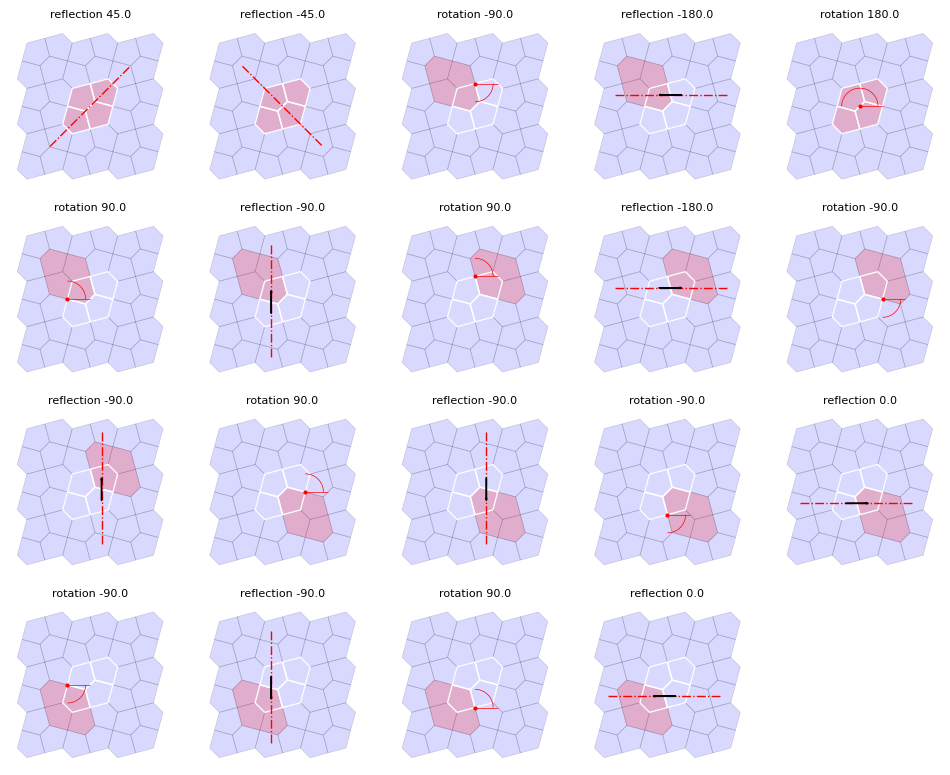

In [22]:
topo.plot_tiling_symmetries(mirror_length = 2500, radius = 400, c = geom.Point(0, 0), )

## Dual tiling from the topology

(-3091.987298, 2958.012702, -2573.6860278, 3073.6860278)

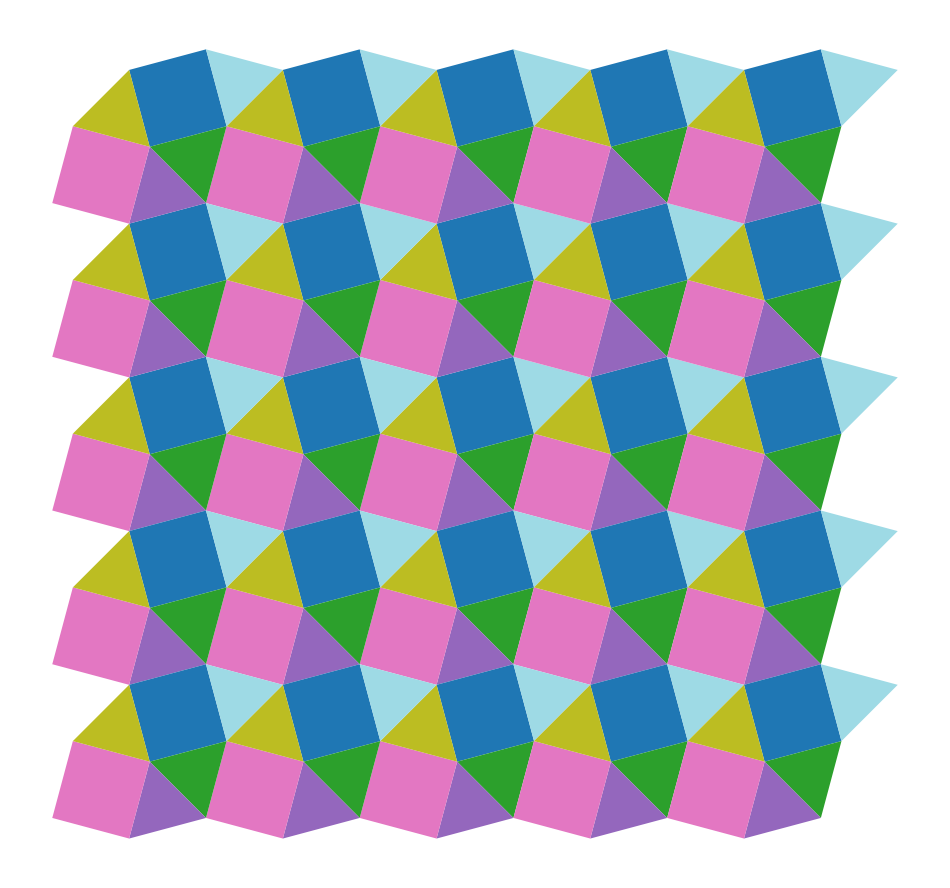

In [23]:
tile2 = copy.deepcopy(topo.tileable)
dual_tiles = list(topo.dual_tiles.values())
tile2.tiles = gpd.GeoDataFrame(
  data = {"tile_id": list("abcdefghijklmnopqrstuvwxyz")[:len(dual_tiles)]},
  geometry = gpd.GeoSeries(dual_tiles))
tile2.setup_regularised_prototile_from_tiles()
ax = tile2.plot(r = 2, show_reg_prototile = False, show_prototile = False,
           cmap = "tab20", r_alpha = 1, show_ids = False, figsize = (12, 12))
pyplot.axis("off")

## Modifying a tiling

CAUTION: new Topology will probably not be correctly labelled. To build a 
correct Topology, extract the tileable attribute and rebuild Topology from that.



<Axes: >

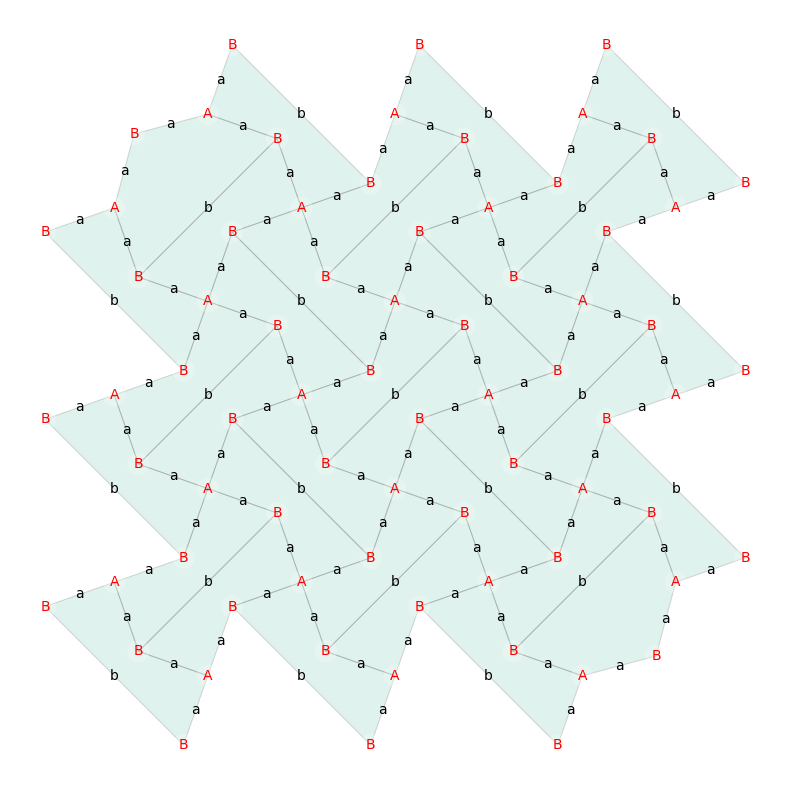

In [24]:
# topo2 = topo \
#   .transform_geometry(True, False, "a", "zigzag_edge",
#                    n=2, start="A", h=.35, smoothness=0) \
#   .transform_geometry(False, True, "b", "zigzag_edge",
#                    n=2, start="A", h=.35, smoothness=0) \

topo2 = topo \
  .transform_geometry(True, True, "b", "scale_edge", sf = 3.5)

topo2.plot(show_vertex_labels = True,
           show_edge_labels = True, 
           show_edges = False, offset_edges = False,
           show_tile_centres = False)

And to see the potential new tiling we do this:

(-3156.80036655, 3156.80036755, -3156.80036655, 3156.80036755)

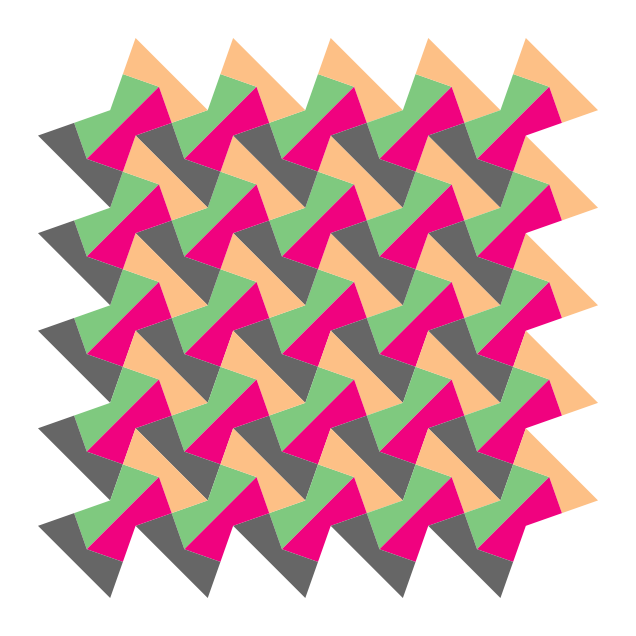

In [25]:
tile_unit = topo2.tileable
tile_unit.plot(r = 2, show_ids = 0, show_prototile = False, show_reg_prototile = False, r_alpha = 1, cmap = "Accent")
pyplot.axis("off")